In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# system parameters
G = 6.67E-11
M_star = 0.2         #M_sol
M_planet = 9.55E-4   #M_sol Jupiter like mass
M_sol = 1.99E30
AU = 1.49E11 
a = 1                #AU Semi-major axis
r = 0.8              #AU min distance between star and planet

In [3]:
c = a - r
b = np.sqrt((a**2) - (c**2))
theta = 0.5
R_vec = np.array([a*np.cos(theta)-c,b*np.sin(theta),0]) #-c important to account for shift in origin
print(R_vec)

[0.67758256 0.46973918 0.        ]


In [4]:
# calculating V using Vis Viva equation since we know that this velocity will be perpendicular to the direction r.

Vmax = np.sqrt(G*(M_star+M_planet)*M_sol * ((2)/(np.linalg.norm(R_vec)*AU) - (1)/(a*AU)))
V_vec = np.array([Vmax*np.sin(theta),Vmax*np.cos(theta),0])

In [5]:
print('V =',V_vec,'m/s')
print(np.linalg.norm(V_vec))

V = [ 7659.32115557 14020.29333191     0.        ] m/s
15976.039111025473


In [6]:
# Calculating a (major semi-axis)
mu = M_star*M_sol*M_sol*M_planet/(M_planet*M_sol+M_star*M_sol)
Eb = abs(0.5*mu*(np.linalg.norm(V_vec))**2  - (G*M_star*M_sol*M_planet*M_sol)/(np.linalg.norm(R_vec)*AU))
print(Eb)
a_calc = (G * M_star*M_sol * M_planet*M_sol) / (2*Eb*AU)

1.6929693278523492e+35


In [7]:
print(a_calc)

1.0


In [8]:
#Calculating e given a systems, R and a.
e = np.sqrt((1-(np.linalg.norm(R_vec))/(abs(a)) )**2 + (np.dot(R_vec,V_vec)**2)/(abs(a)*G*(M_planet+M_star)*M_sol))
#e = np.sqrt((1-(r*AU)/(abs(a)))**2) 0.64 + ..
print(e)

0.17551651239288418


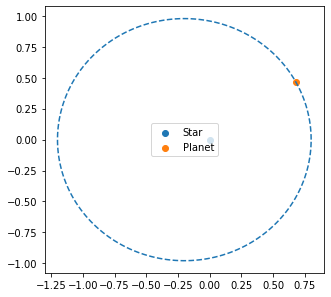

In [9]:
# plotting a ellipse with given a and b.
def ellipse(a,b,t):
    u = -c     #x-position of the center
    x = u + a*np.cos(t)
    y = b*np.sin(t)
    return x,y
t = np.linspace(0,2*np.pi, 200)
x,y = ellipse(a,b,t)
plt.figure(figsize=[5*a,5*b]) #figsize changes to appropriate deimensions.
plt.plot(x,y,linestyle='--')
plt.scatter(0,0,label='Star')
plt.scatter(R_vec[0],R_vec[1],label='Planet')
plt.legend()
plt.show()

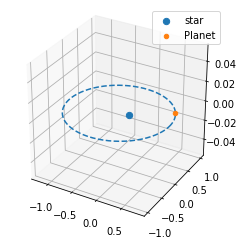

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(0,0,0,label='star',s=40)
ax.plot(x,y,0,linestyle='--')
ax.scatter(R_vec[0],R_vec[1],0,label='Planet')
ax.set_box_aspect([1*a,1*b,1]) #figsize changes to appropriate dimentions
plt.legend()
plt.show()

In [11]:
theta_1 = 0
phi = np.pi
sig = 0
M_rot = np.array([[np.cos(theta_1)*np.cos(phi),np.cos(theta_1)*np.sin(phi), - np.sin(theta_1)],
                    [- np.cos(sig)*np.sin(phi) + np.sin(sig)*np.sin(theta_1)*np.cos(phi),np.cos(sig)*np.cos(phi) + np.sin(sig)*np.sin(theta_1)*np.sin(phi),np.sin(sig)*np.cos(theta_1)],
                    [np.sin(sig)*np.sin(theta_1) + np.cos(sig)*np.sin(theta_1)*np.cos(phi),-np.sin(sig)*np.cos(theta_1) + np.cos(sig)*np.sin(theta_1)*np.sin(phi),np.sin(sig)*np.cos(theta_1)]])

R_rot = np.multiply(M_rot,R_vec)

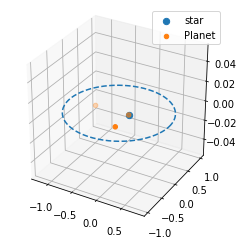

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(0,0,0,label='star',s=40)
ax.plot(x,y,0,linestyle='--')
ax.scatter(R_rot[0],R_rot[1],R_rot[2],label='Planet')
ax.set_box_aspect([1*a,1*b,1]) #figsize changes to appropriate dimentions
plt.legend()
plt.show()